<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-файл" data-toc-modified-id="Откроем-и-изучим-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем и изучим файл</a></span></li><li><span><a href="#Разбьем-данные-на-выборки" data-toc-modified-id="Разбьем-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбьем данные на выборки</a></span></li><li><span><a href="#Исследуем-модели" data-toc-modified-id="Исследуем-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуем модели</a></span></li><li><span><a href="#Проверим-модель-на-тестовой-выборке" data-toc-modified-id="Проверим-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверим модель на тестовой выборке</a></span></li><li><span><a href="#(бонус)-Проверим-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверим-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверим модели на адекватность</a></span></li></ul></div>

# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройим модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откроем и изучим файл

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

data=pd.read_csv('/datasets/users_behavior.csv')
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [31]:
print(data['calls'].corr(data['minutes']))
print(data['calls'].corr(data['messages']))
print(data['calls'].corr(data['mb_used']))
print(data['minutes'].corr(data['messages']))
print(data['minutes'].corr(data['mb_used']))
print(data['messages'].corr(data['mb_used']))

0.9820832355742292
0.17738450121769536
0.28644151203505447
0.17311022580969082
0.28096693508821474
0.1957211209558215


Text(0, 0.5, 'minutes')

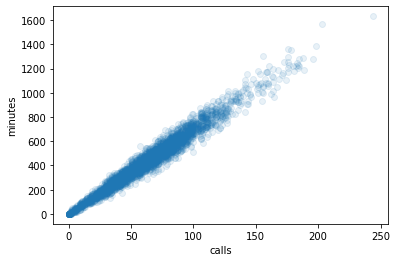

In [32]:
plt.scatter(data=data, x="calls", y="minutes", alpha = 0.1)
plt.xlabel("calls")
plt.ylabel("minutes")

In [28]:
data=data.drop(['calls'], axis=1)
data.head()

,minutes,messages,mb_used,is_ultra
0,311.90,83.0,19915.42,0
1,516.75,56.0,22696.96,0
2,467.66,86.0,21060.45,0
3,745.53,81.0,8437.39,1
4,418.74,1.0,14502.75,0


Наибольшая корреляция наблюдается между столбцами calls и minutes и равна 0.9820832355742292
Тк. в тарифах обычно трафиком является не количество звонков, а количество минут, то столбец calls можно исключить.

## Разбьем данные на выборки

In [14]:
data_train, data_valid = train_test_split(data, test_size=0.4, random_state=1)
data_valid, data_test = train_test_split(data_valid, test_size=0.5, random_state=1)
features_train=data_train.drop(['is_ultra'], axis=1)
target_train=data_train['is_ultra']
features_valid=data_valid.drop(['is_ultra'], axis=1)
target_valid=data_valid['is_ultra']
features_test=data_test.drop(['is_ultra'], axis=1)
target_test=data_test['is_ultra']

## Исследуем модели

In [15]:
best_model_tree = None
best_result_tree = 0
for depth in range(1,10):
    model_tree = DecisionTreeClassifier(random_state=1, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid_tree = model_tree.predict(features_valid)
    result_tree = accuracy_score(target_valid, predictions_valid_tree)
    print(result_tree)
    if result_tree>best_result_tree:
        best_model_tree = model_tree
        best_result_tree = result_tree
print("Accuracy лучшей модели tree:", best_result_tree, ", при параметре max_depth =",depth )
print('******************************************************************************')
best_model_forest = None
best_result_forest = 0
for est in range(1, 100, 5):
    model_forest = RandomForestClassifier(random_state=1, n_estimators=est) 
    model_forest.fit(features_train,target_train) 
    predictions_valid_forest = model_forest.predict(features_valid)
    result_forest = accuracy_score(target_valid, predictions_valid_forest) 
    print(result_forest)
    if result_forest > best_result_forest:
        best_model_forest = model_forest
        best_result_forest = result_forest

print("Accuracy наилучшей модели forest:", best_result_forest, ", при параметре n_estimators =",est )
print('******************************************************************************')
best_model_logistict = None
best_result_logistic = 0
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solver:
    model_logistic = LogisticRegression(random_state=1, solver=solver, max_iter=1000)
    model_logistic.fit(features_train,target_train) 
    predictions_valid_logistic = model_logistic.predict(features_valid)
    result_logistic = accuracy_score(target_valid, predictions_valid_logistic) 
    print(result_logistic,solver)
    if result_logistic > best_result_logistic:
        best_model_logistic = model_logistic
        best_result_logistic = result_logistic
print("Accuracy наилучшей модели logistic:", best_result_logistic, ", при параметре solver = ",solver)

0.71850699844479
0.7558320373250389
0.7713841368584758
0.7573872472783826
0.7682737169517885
0.7620528771384136
0.7542768273716952
0.7558320373250389
0.7698289269051322
Accuracy лучшей модели tree: 0.7713841368584758 , при параметре max_depth = 9
******************************************************************************
0.7371695178849145
0.7713841368584758
0.7682737169517885
0.7791601866251944
0.7744945567651633
0.7744945567651633
0.7807153965785381
0.7869362363919129
0.7900466562986003
0.7822706065318819
0.7822706065318819
0.7853810264385692
0.7838258164852255
0.7822706065318819
0.7838258164852255
0.7807153965785381
0.776049766718507
0.776049766718507
0.776049766718507
0.7776049766718507
Accuracy наилучшей модели forest: 0.7900466562986003 , при параметре n_estimators = 96
******************************************************************************
0.713841368584759 newton-cg


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSea

0.713841368584759 lbfgs
0.6749611197511665 liblinear


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.6687402799377916 sag
0.6640746500777605 saga
Accuracy наилучшей модели logistic: 0.713841368584759 , при параметре solver =  saga


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## Проверим модель на тестовой выборке

In [16]:
model_tree = DecisionTreeClassifier(random_state=1, max_depth=9)
model_tree.fit(features_train, target_train)
predictions_test_tree = model_tree.predict(features_test)
result_tree_test = accuracy_score(target_test, predictions_test_tree)
print(result_tree_test)
print("Accuracy модели tree_test:", result_tree_test)
print('******************************************************************************')
model_forest = RandomForestClassifier(random_state=1, n_estimators=96) 
model_forest.fit(features_train,target_train) 
predictions_test_forest = model_forest.predict(features_test)
result_forest_test = accuracy_score(target_test, predictions_test_forest) 
print("Accuracy наилучшей модели forest_test:", result_forest_test, ", при параметре n_estimators = 96" )
print('******************************************************************************')
model_logistic = LogisticRegression(random_state=1, solver='saga', max_iter=1000)
model_logistic.fit(features_train,target_train) 
predictions_test_logistic = model_logistic.predict(features_test)
result_logistic_test = accuracy_score(target_test, predictions_test_logistic) 
print(result_logistic_test)
print("Accuracy наилучшей модели logistic:", result_logistic_test, ", при параметре max_iter = 1000")

0.776049766718507
Accuracy модели tree_test: 0.776049766718507
******************************************************************************
Accuracy наилучшей модели forest_test: 0.7947122861586314 , при параметре n_estimators = 96
******************************************************************************
0.6982892690513219
Accuracy наилучшей модели logistic: 0.6982892690513219 , при параметре max_iter = 1000


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## (бонус) Проверим модели на адекватность

In [17]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(random_state=1, strategy='most_frequent').fit(features_train, target_train)
dummy_pred = dummy.predict(features_test)
result_dummy = accuracy_score(target_test, dummy_pred)
print('Точность: ', result_dummy)

Точность:  0.6936236391912908


In [18]:
status = pd.DataFrame([['tree',best_result_tree,result_tree_test,result_dummy],
                  ['forest',best_result_forest,result_forest_test,result_dummy],
                  ['logistic',best_result_logistic,result_logistic_test,result_dummy]], 
columns=['model','result_valid','result_test','dummy'])
status['test-dummy']=status['result_test']-status['dummy']
status.sort_values('result_valid', ascending=False).reset_index(drop=True)

,model,result_valid,result_test,dummy,test-dummy
0,forest,0.790047,0.794712,0.693624,0.101089
1,tree,0.771384,0.776050,0.693624,0.082426
2,logistic,0.713841,0.698289,0.693624,0.004666


Обучив модели DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, мы добились точности на валидационной выборке от 0.720062	до 0.797823 и точности от 0.698289 до 0.802488 на тестовой выборке. Применив метод дамми на тестовых данных, мы достигли точности в 0.6936236391912908. 